In [34]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv('1667220168455_IMG_20221031_173757.csv')
dataset.head()

,Run order,(X),(Xp),(Xg),(X4),"(Y,)",(Yo),(Ys)
0,1,15.0,40,10,3.0,77.59,80.73,79.67
1,2,17.5,40,5,6.0,87.94,90.21,89.02
2,3,17.5,50,15,4.5,92.95,95.17,93.98
3,4,15.0,40,10,6.0,71.85,77.76,77.09
4,5,20.0,40,10,3.0,92.47,94.42,93.17


In [35]:
#dependent and independent variable
X = dataset.iloc[:, 1:5]
y = dataset.iloc[:, 5]#BOD removal percentage
X
y

0     77.59
1     87.94
2     92.95
3     71.85
4     92.47
5     93.34
6     64.06
7     92.37
8     79.58
9     76.75
10    94.72
11    76.17
12    92.56
13    91.62
14    86.61
15    80.94
16    84.21
17    80.14
18    92.65
19    95.45
20    88.87
21    93.66
22    86.33
23    90.21
24    92.82
25    94.22
26    89.89
27    78.88
28    91.95
Name: (Y,), dtype: float64

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape

(23, 4)

In [38]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 4))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the fourth hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the fifth hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model_history=model.fit(X_train, y_train, batch_size = 5,validation_split=0.2, epochs = 100)



Epoch 1/100


c:\python\python38\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


4/4 [==============================] - 0s 41ms/step - loss: 7563.5479 - val_loss: 6994.9829
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 7541.6538 - val_loss: 6976.2827
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 7516.5762 - val_loss: 6955.9248
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 7487.4551 - val_loss: 6929.9233
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 7451.8022 - val_loss: 6895.3545
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 7404.0068 - val_loss: 6849.0884
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 7342.0288 - val_loss: 6787.3945
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 7256.5815 - val_loss: 6701.7632
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 7144.7056 - val_loss: 6585.8623
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 699

In [39]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 99ms/step


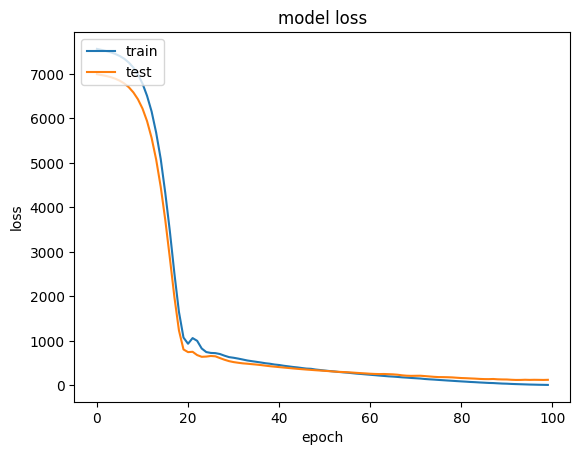

In [40]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



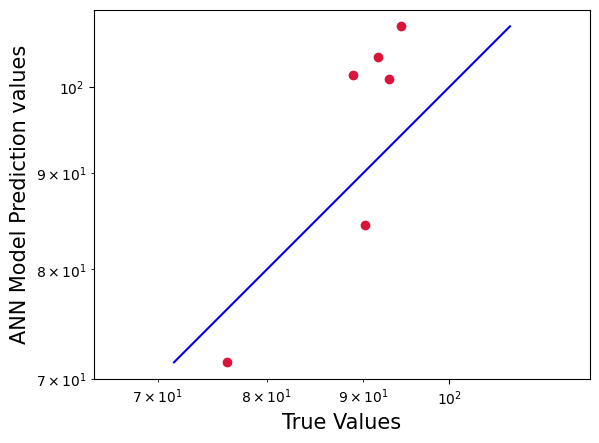

In [41]:

plt.scatter( y_test, y_pred,c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('ANN Model Prediction values', fontsize=15)
plt.axis('equal')
plt.show()